##### Exercise 1

In [36]:
g <- function(theta){
    return(0.5*exp(-0.5*(theta+3)^2)+0.5*exp(-0.5*(theta-3)^2))
}

g_log <- function(theta){
    return(log10(g(theta)))
}

metropolos_1d <- function(theta.init,n.iter,sigma){
    X <- c(NA)
    Y <- c(NA)
    n.accepted <- 0
    theta.cur <- theta.init
    func.cur <- g_log(theta.init)
    
    for (i in 1:n.iter){
        theta.prop <- rnorm(n = 1, mean = theta.cur,sd = sigma )
        func.prop <- g_log(theta.prop)
        log_metr_ratio <-   func.prop - func.cur 
        if (log_metr_ratio >= 1 || log_metr_ratio > log10(runif(1,0,1))){
            theta.cur <- theta.prop
            func.cur <- func.prop
            X[i] <- theta.cur 
            Y[i] <- func.cur 
            n.accepted <- n.accepted +1
        }
        else {
            theta.cur <- theta.cur
            func.cur <- g_log(theta.cur)
        }

    }
    X <- X[! is.na(X)]
    Y <- Y[! is.na(Y)]
    return(list(X = X, Y = Y,n.accepted=n.accepted))
}

In [38]:
g_metropolis$n.accepted/n.iter*100

[1] 53.418

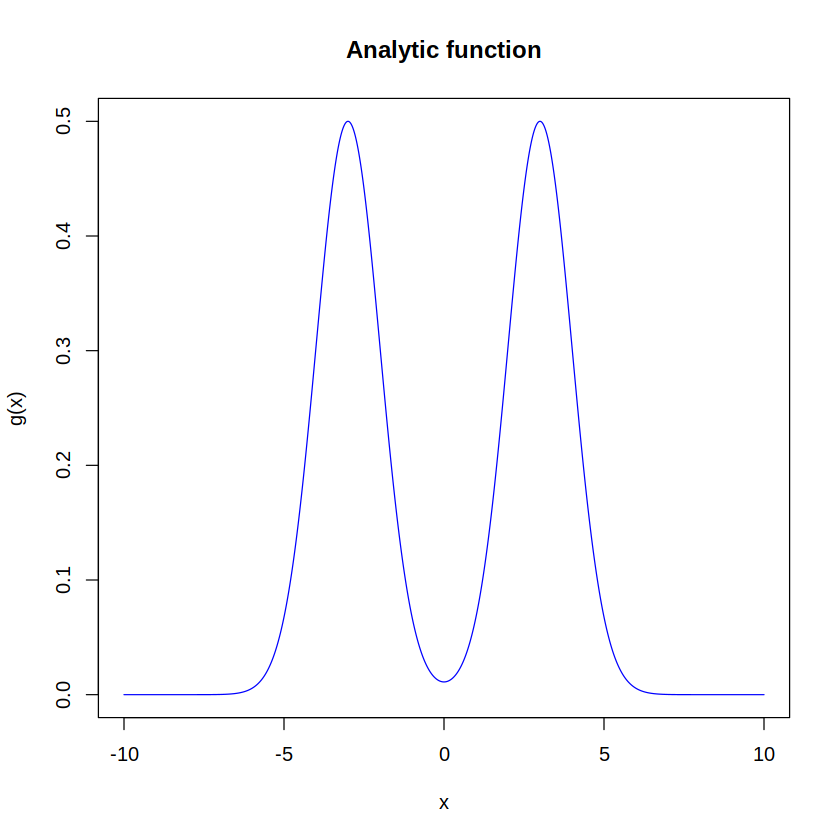

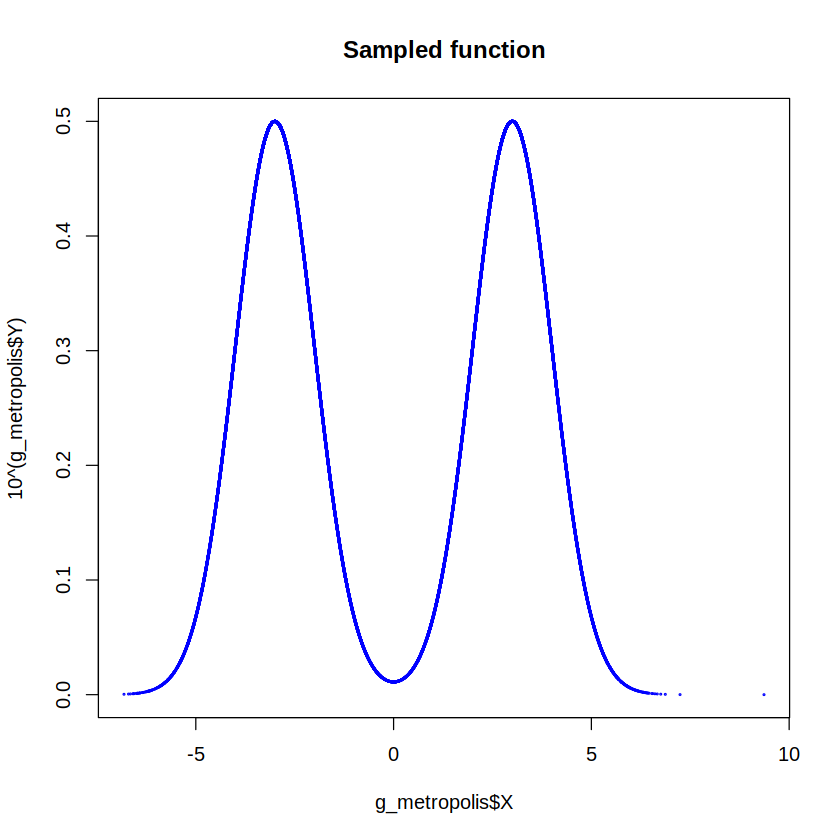

In [37]:
x <- seq(-10,10,0.001)

theta.init <- 10
n.iter <- 10^5
sigma <- 2

g_metropolis <- metropolos_1d(theta.init,n.iter,sigma)

plot(x, g(x), type='l', col='blue', main='Analytic function')
plot(g_metropolis$X, 10**(g_metropolis$Y), type='p', cex = 0.2, col='blue', main='Sampled function')


In [20]:
library(coda)

var1 
2610.375

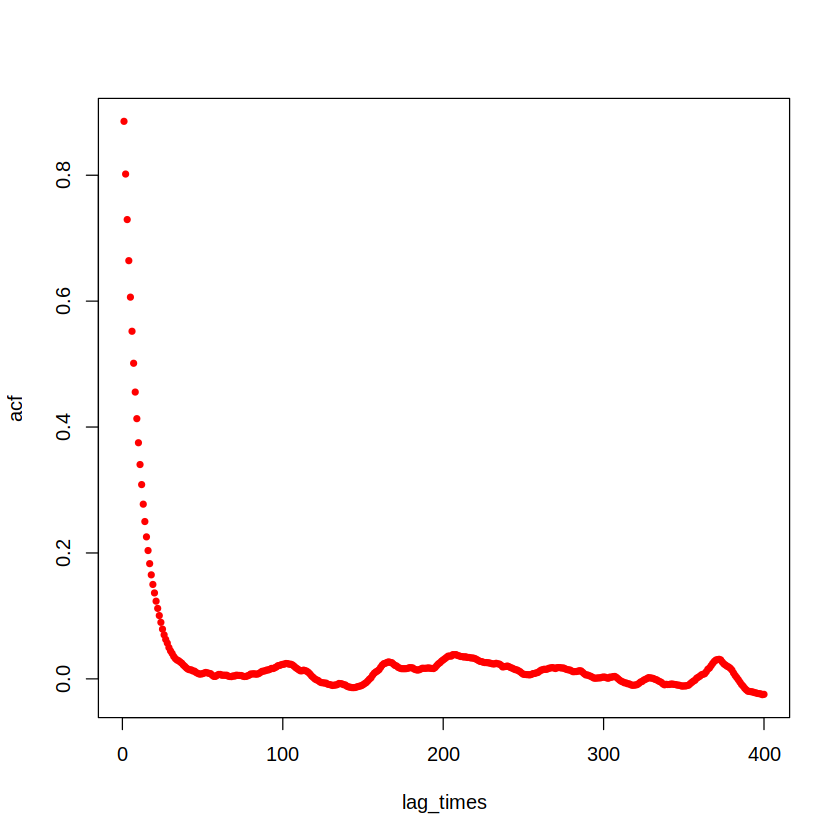

In [47]:
lag_times <- seq(1,400,1)
x <- as.mcmc(g_metropolis$X)
effectiveSize(x)
acf <- autocorr(x = x,lags = lag_times)
plot(lag_times, acf, type='p', col='red', pch=20)

##### Exercise 2

##### Exercise 3

In [24]:
library(magrittr)
library(lubridate)
library(dplyr)
library(ggplot2)

In [20]:
# Set the file path
vaccinations_path <- "vaccinations.csv"

# Load the CSV file
vaccinations <- read.csv(vaccinations_path)
vaccinations <- vaccinations %>% filter (!is.na(people_vaccinated)) #delete the NA
vaccinations <- vaccinations %>% filter (!is.na(total_vaccinations)) #delete the NA
vaccinations[1:3,]

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0.00,0.00,NA,NA,NA,NA,NA
2,Afghanistan,AFG,2021-02-28,8200,8200,NA,NA,NA,1367,0.02,0.02,NA,NA,33,1367,0.003
3,Afghanistan,AFG,2021-03-16,54000,54000,NA,NA,NA,2862,0.13,0.13,NA,NA,70,2862,0.007


In [25]:
#convert date in date format
df <- vaccinations
df$date <- as.Date(df$date)

#define the day of the year and the year
df$day_year <- yday(df$date)
df$year <- year(df$date)

#filter by year
df_2022 <- df %>% filter (df$year == 2022)
df_2022 <- df_2022 %>% filter (!is.na(total_vaccinations)) #delete the NA

#group by day and mean
df_2022 <- df_2022 %>%  group_by(day_year) %>% summarize(vacc_tot = sum(total_vaccinations))


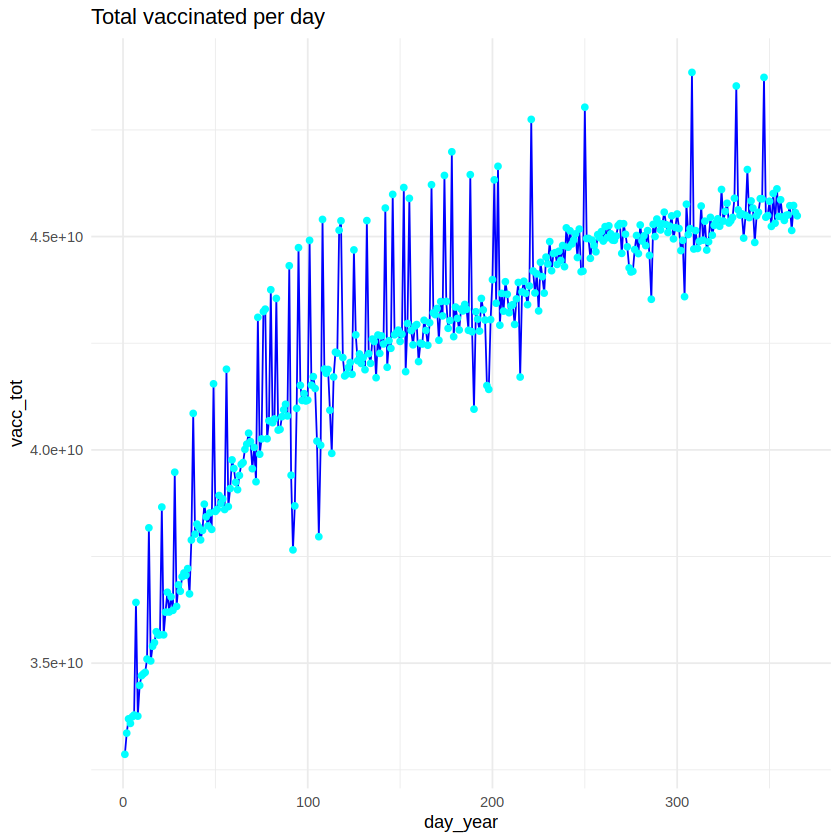

In [32]:
ggplot(df_2022, aes(x=day_year, y=vacc_tot))+
geom_line(color='blue')+
geom_point(color='cyan')+
theme_minimal()+
labs(title='Total vaccinated per day')


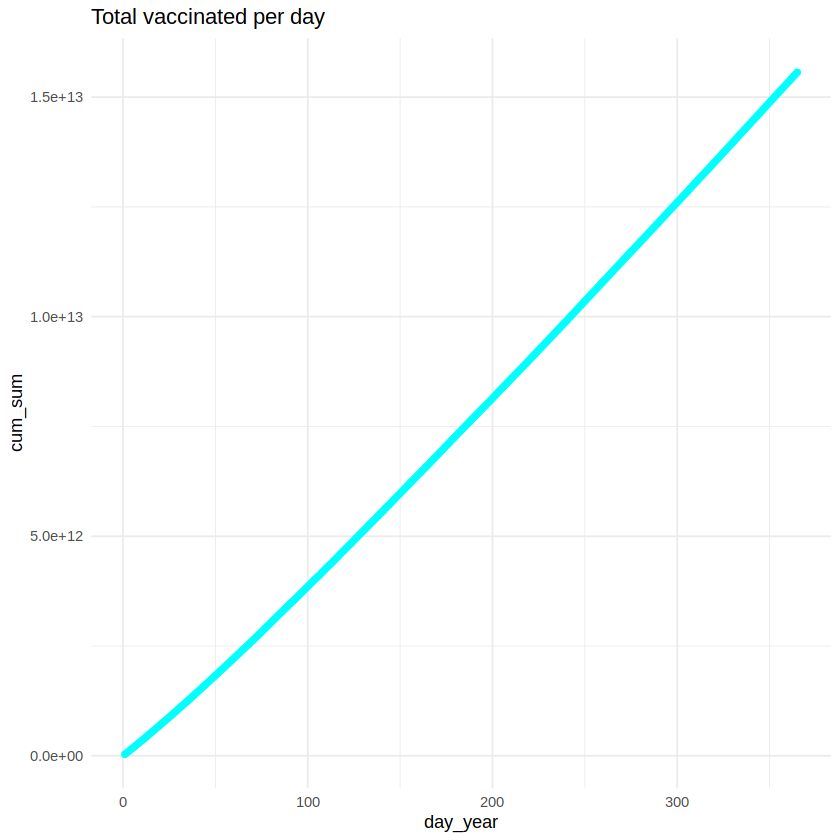

In [34]:
df_2022$cum_sum <- cumsum(df_2022$vacc_tot)
ggplot(df_2022, aes(x=day_year, y=cum_sum))+
geom_line(color='blue')+
geom_point(color='cyan')+
theme_minimal()+
labs(title='Total vaccinated per day')


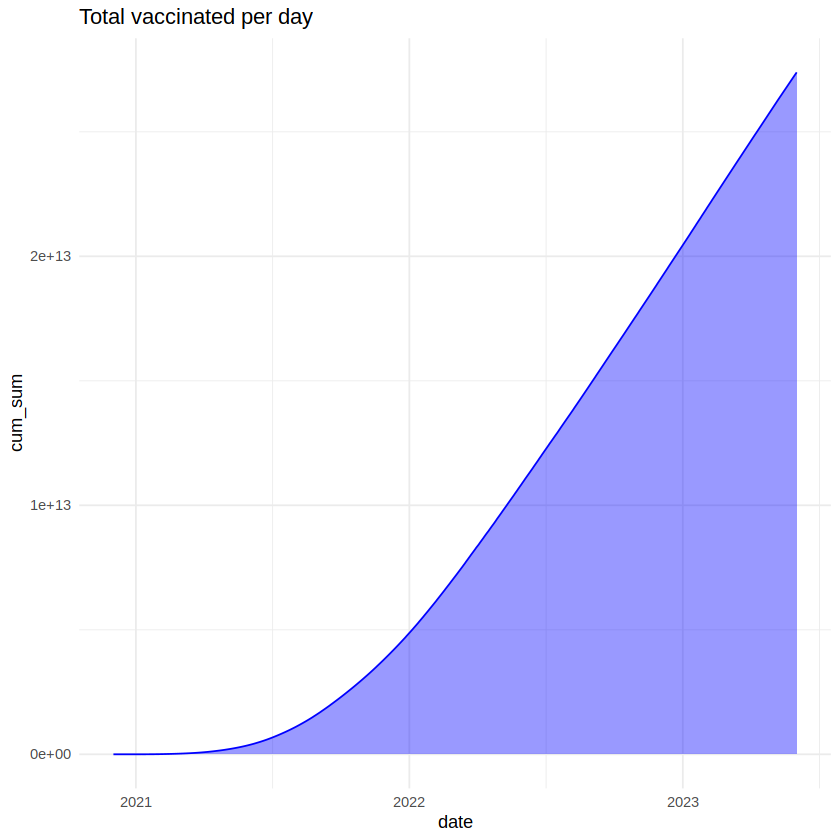

In [47]:
#group by day and mean
df_tot <- df %>%  group_by(date) %>% summarize(vacc_tot = sum(total_vaccinations))

df_tot$cum_sum <- cumsum(df_tot$vacc_tot)

ggplot(df_tot, aes(x=date, y=cum_sum))+
geom_line(color='blue')+
geom_ribbon(aes(ymin=0, ymax=cum_sum),fill='blue', alpha=0.4)+
theme_minimal()+
labs(title='Total vaccinated per day')
